Epoch 1/5
  21/1875 [..............................] - ETA: 9s - loss: 1.9838 - accuracy: 0.4479

2023-03-03 21:57:56.162101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1871/1875 [============================>.] - ETA: 0s - loss: 0.3506 - accuracy: 0.9139

2023-03-03 21:58:06.021193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 11s 6ms/step - loss: 0.3501 - accuracy: 0.9140 - val_loss: 0.1865 - val_accuracy: 0.9522
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1663 - accuracy: 0.9558 - val_loss: 0.1366 - val_accuracy: 0.9656
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1248 - accuracy: 0.9676 - val_loss: 0.1126 - val_accuracy: 0.9696
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1017 - accuracy: 0.9739 - val_loss: 0.0993 - val_accuracy: 0.9733
Epoch 5/5
 56/313 [====>.........................] - ETA: 0s

2023-03-03 21:58:51.023755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step
313/313 - 1s - loss: 0.0894 - accuracy: 0.9750 - 1s/epoch - 4ms/step
Time taken: 55.1414520740509 seconds


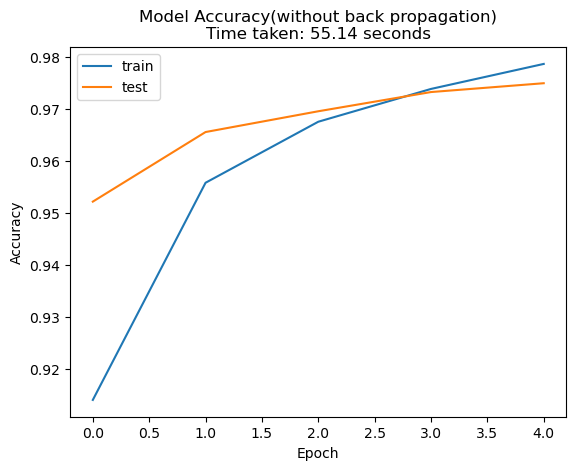

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

# Load and preprocess the dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images / 255.0
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images / 255.0

# Define the CNN architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv2d_1', trainable=False),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_2', trainable=False),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_3', trainable=False),
    tf.keras.layers.Flatten(name='flatten'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

# Compile the model
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and display the activations after each epoch
start_time = time.time()
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))
end_time = time.time()

# Get the layer outputs and names
layer_names = ['conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3']
layer_outputs = [layer.output for layer in model.layers if layer.name in layer_names]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# Get the activation outputs for the test images
activations = activation_model.predict(test_images)

# Display the activation outputs of the convolutional layers as images on a grid
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Time taken:", end_time - start_time, "seconds")

# Plot the accuracy graph with time taken
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy(without back propagation)\nTime taken: {:.2f} seconds'.format(end_time - start_time))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
